In [1]:
from functions import *


import warnings
warnings.filterwarnings('ignore')

### Import a Dataset

In [2]:
data= loaddataset('dataset.csv', 'Z8RsBpxhnkebK5fvahVCmfV7icO2')

In [3]:
data.head()

,uid,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:00:00,77.0,0.0,0.0,0.0,0.0,0.0,90.82098,0.0,0.0,0.0,0.0,0.0,0.0
824,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:15:00,75.0,49.0,0.0,0.0,0.0,0.0,90.61686,0.0,0.0,0.0,0.0,0.0,0.0
825,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:30:00,73.0,71.0,0.0,0.0,0.0,0.0,86.22828,0.0,0.0,0.0,0.0,0.0,0.0
826,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:45:00,89.0,650.0,0.0,0.0,0.0,0.0,82.04382,0.0,0.0,0.0,0.0,0.0,0.0
827,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 13:00:00,97.0,393.0,0.0,0.0,0.0,0.0,79.90056,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = preprocess(data,1)

### The final dataset will be: 

In [5]:
data.head()

,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,77,0,0,0,0,0,90,0,0,0,0,0,0
824,75,49,0,0,0,0,90,0,0,0,0,0,0
825,73,71,0,0,0,0,86,0,0,0,0,0,0
826,89,650,0,0,0,0,82,0,0,0,0,0,0
827,97,393,0,0,0,0,79,0,0,0,0,0,0


### Let’s create our model. We are trying to predict a patient diabetes value. This coincides with the ‘sugarValue’ column, which will be our independent variable. We’ll use all the other columns as features for our model.

In [6]:
X = data.drop('sugarValue', axis=1)
y = data['sugarValue']

### We’ll use train-test-split to split the data into training data and testing data, and create a random forest model.


### Create a windows, compute the predictions and calculate the MAE and RMSE for each window. Save the values in a dataset. 


In [7]:
window = prediction(data,3, X, y)


--- 74699.84427642822 Seconds for computation ---


### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - RMSE (root mean square error)
#### - Predictive horizons (PHs) for each window.

In [8]:
window

,Current train,Current test,MSE,RMSE,Interval
0,From: 823 to: 838,From: 839 to: 839,16.00,4.000000,15Min 3PSW
1,From: 824 to: 839,From: 840 to: 840,49.00,7.000000,15Min 3PSW
2,From: 825 to: 840,From: 841 to: 841,100.00,10.000000,15Min 3PSW
3,From: 826 to: 841,From: 842 to: 842,9.00,3.000000,15Min 3PSW
4,From: 827 to: 842,From: 843 to: 843,169.00,13.000000,15Min 3PSW
...,...,...,...,...,...
22809,From: 1946 to: 2090,From: 2091 to: 2094,65.50,8.093207,60Min 36PSW
22810,From: 1947 to: 2091,From: 2092 to: 2095,29.50,5.431390,60Min 36PSW
22811,From: 1948 to: 2092,From: 2093 to: 2096,43.75,6.614378,60Min 36PSW
22812,From: 1949 to: 2093,From: 2094 to: 2097,58.75,7.664855,60Min 36PSW


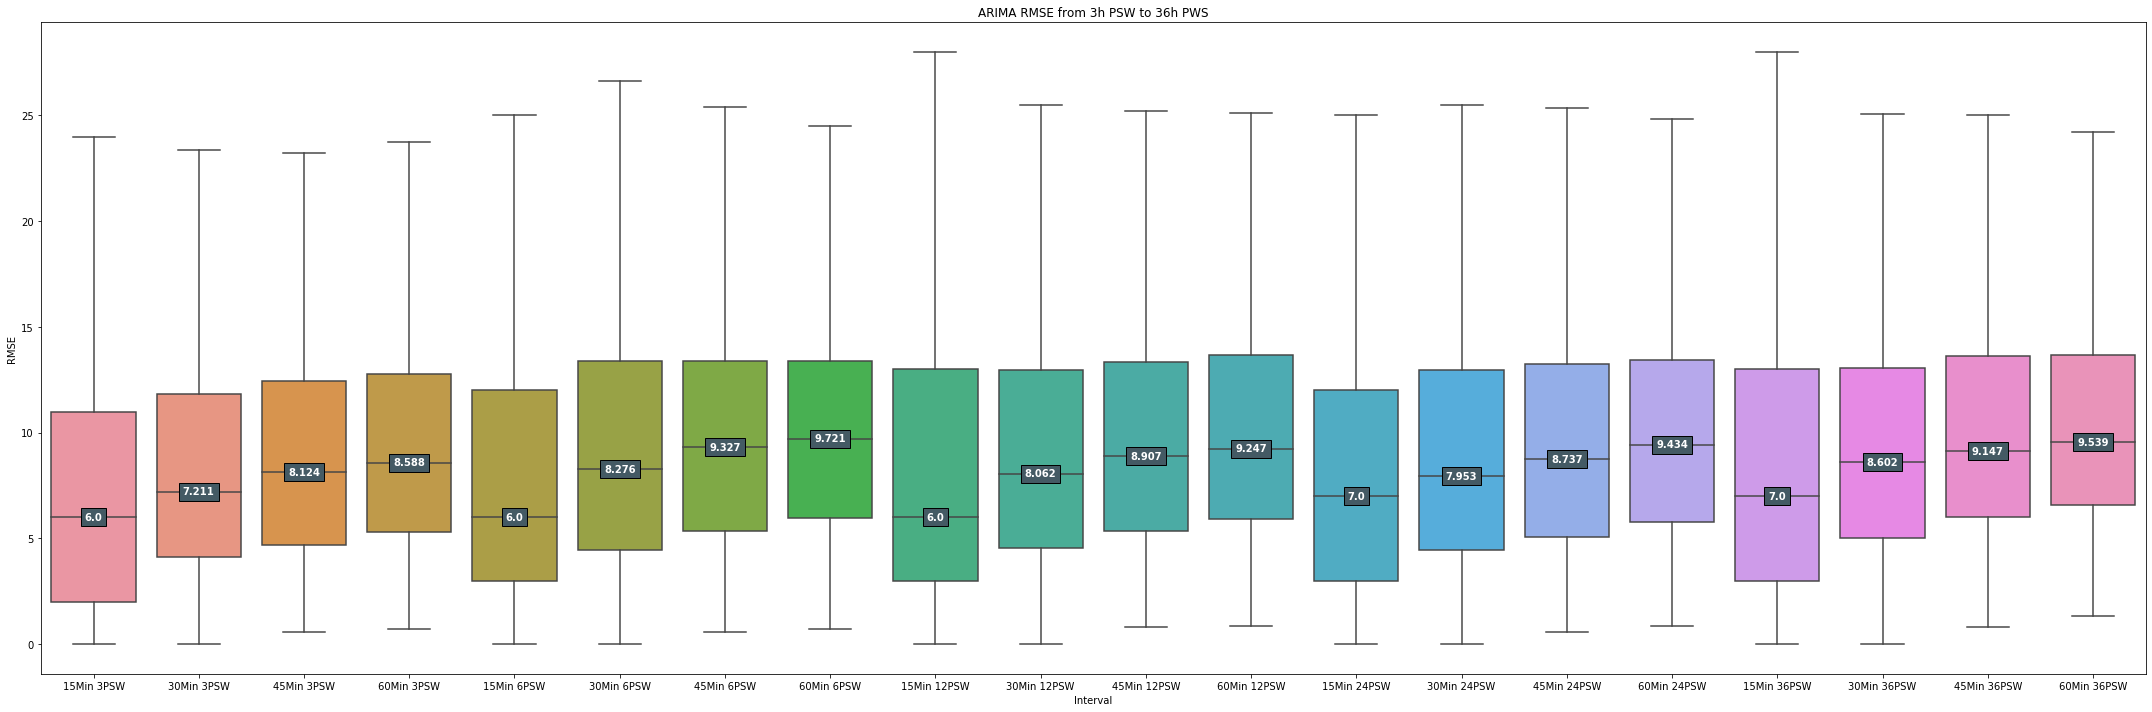

In [9]:
boxplot(window)